In [1]:
import pandas as pd

In [5]:
data=pd.read_excel('heart_disease.xlsx',sheet_name='Heart_disease')

In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [28]:
df=data.copy()

In [29]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [30]:
df['oldpeak'] = df.groupby('cp')['oldpeak'].transform(lambda x: x.fillna(x.mean()))


In [31]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalch'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'num'}>]], dtype=object)

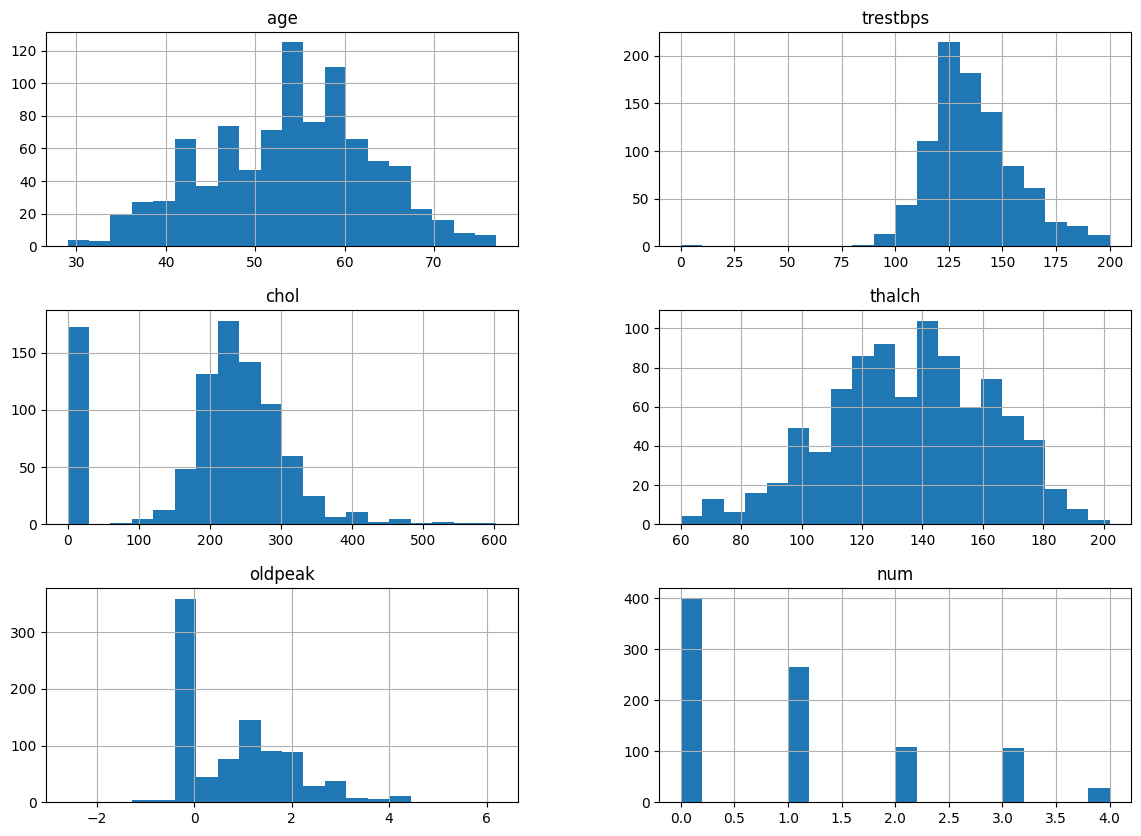

In [32]:
# Histograms
df.hist(bins=20, figsize=(14,10))

In [33]:
# Visualize the distribution of features 
import seaborn as sns 
import matplotlib.pyplot as plt

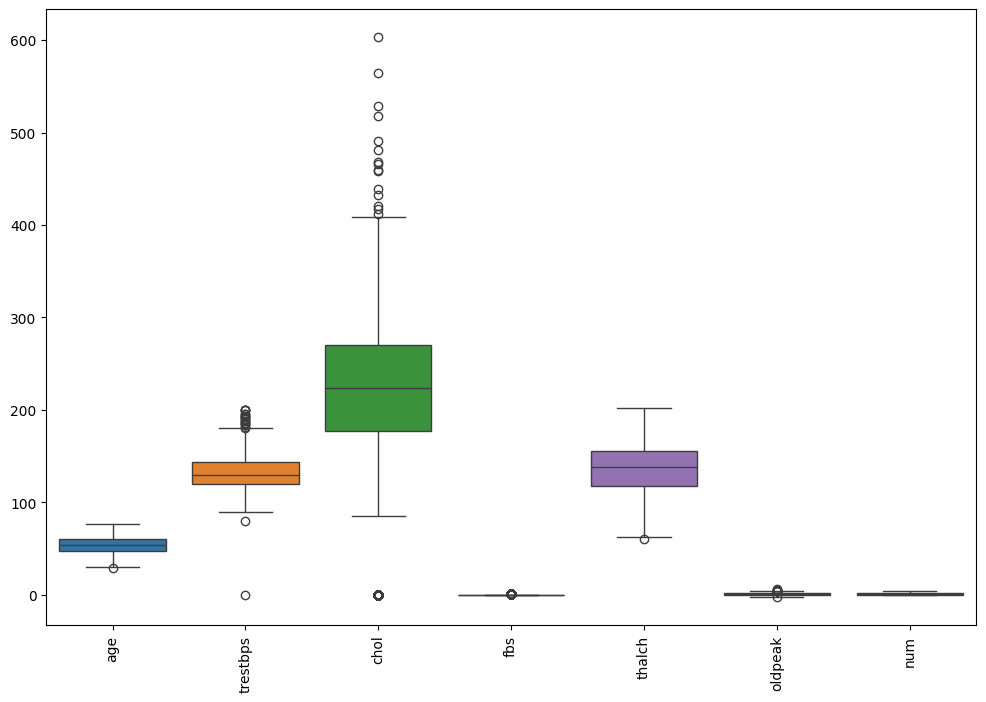

In [34]:
# Box plots 
plt.figure(figsize=(12,8)) 
sns.boxplot(data=df) 
plt.xticks(rotation=90) 
plt.show()

C:\Users\rites\AppData\Local\Temp\ipykernel_21224\4227120492.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


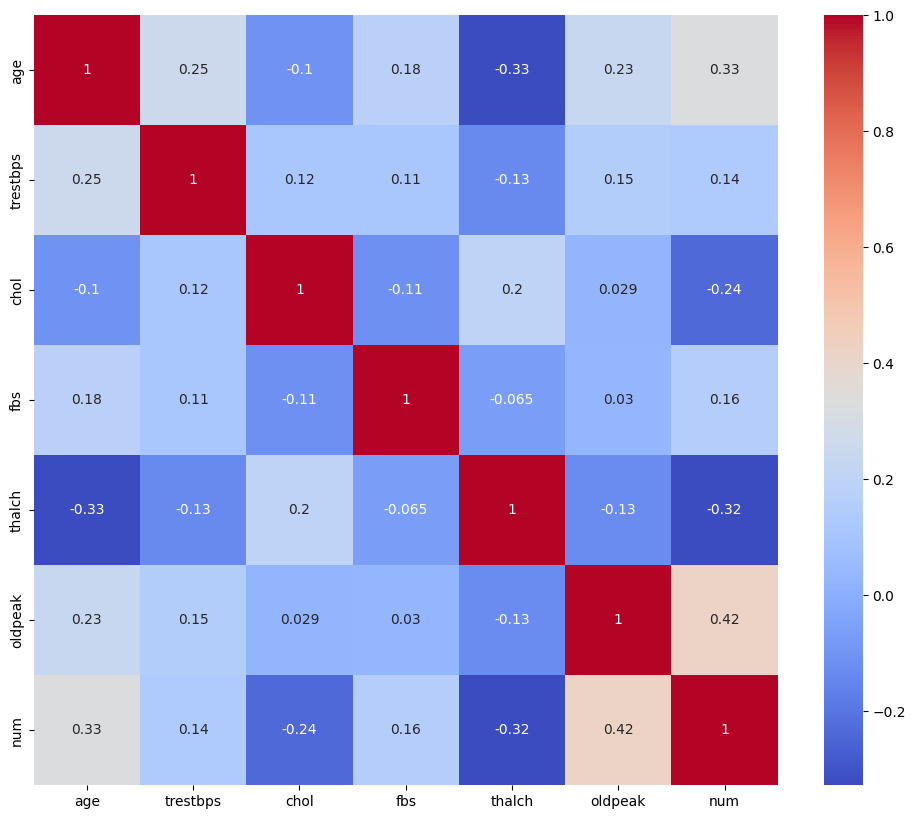

In [35]:
# Correlation matrix 
plt.figure(figsize=(12,10)) 
sns.heatmap(df.corr(), annot=True, cmap='coolwarm') 

plt.show()

In [36]:
df2=df.copy()

In [37]:
for col in df2.select_dtypes(include=['object']).columns:
    print(f"Column: {col}")
    print(df2[col].unique())
    

Column: sex
['Male' 'Female']
Column: cp
['typical angina' 'atypical angina' 'asymptomatic' 'non-anginal']
Column: restecg
['lv hypertrophy' 'normal' 'st-t abnormality']
Column: exang
[False True 'FALSE' 'TURE']
Column: slope
['downsloping' 'flat' 'upsloping']
Column: thal
['fixed defect' 'normal' 'reversable defect']


In [38]:
from sklearn.preprocessing import StandardScaler


In [39]:
# Convert categorical columns to numerical using OneHotEncoder or LabelEncoder
categorical_columns = ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']

# OneHotEncoding for categorical columns
df2 = pd.get_dummies(df2, columns=categorical_columns, drop_first=False)


In [22]:
df.head()

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,exang_True,exang_FALSE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145,233,True,150,2.3,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,41,135,203,False,132,0.0,0,1,1,0,0,1,0,0,0,0,1,0,0,0
2,57,140,192,False,148,0.4,0,1,0,0,0,1,0,0,0,0,1,0,0,0
3,52,118,186,False,190,0.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
4,57,110,201,False,126,1.5,0,1,0,0,0,1,0,1,0,0,1,0,0,0


In [40]:
# Identify numerical columns
numerical_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

# Standardize numerical columns
scaler = StandardScaler()
df2[numerical_columns] = scaler.fit_transform(df2[numerical_columns])


In [41]:
# Convert 'fbs' to integers (if not already)
df2['fbs'] = df2['fbs'].astype(int)

In [42]:
df2.head()

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,...,exang_False,exang_True,exang_FALSE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,1.006027,0.567394,0.281297,1,0.524183,1.330183,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
1,-1.397560,0.076967,0.013526,0,-0.147705,-0.842983,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
2,0.350503,0.322181,-0.084656,0,0.449529,-0.465041,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
3,-0.195767,-0.756760,-0.138211,0,2.017268,-0.842983,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
4,0.350503,-1.149102,-0.004325,0,-0.371668,0.574299,0,0,1,1,...,0,1,0,0,0,1,0,1,0,0


In [54]:
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 


In [55]:
# Split the dataset 
X = df2.drop('num', axis=1)
y = df2['num'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Train Decision Tree Classifier 
dt_model = DecisionTreeClassifier(random_state=42) 
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [64]:

from sklearn.metrics import classification_report,accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay


In [65]:
y_pred = dt_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro')}")
print(f"Recall: {recall_score(y_test, y_pred, average='macro')}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='macro')}")

Accuracy: 0.510989010989011
Precision: 0.30248293532046394
Recall: 0.30255137294958845
F1 Score: 0.3014465044877943


In [72]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [3,7,10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['entropy']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)

# Predict and evaluate
y_pred_best = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))
print("ROC AUC Score:", roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr'))


Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
Best Model: DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
Accuracy: 0.554945054945055
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.87      0.75        89
           1       0.38      0.50      0.43        48
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00         6

    accuracy                           0.55       182
   macro avg       0.21      0.27      0.24       182
weighted avg       0.43      0.55      0.48       182

ROC AUC Score: 0.7307765593404069


c:\Users\rites\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rites\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rites\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

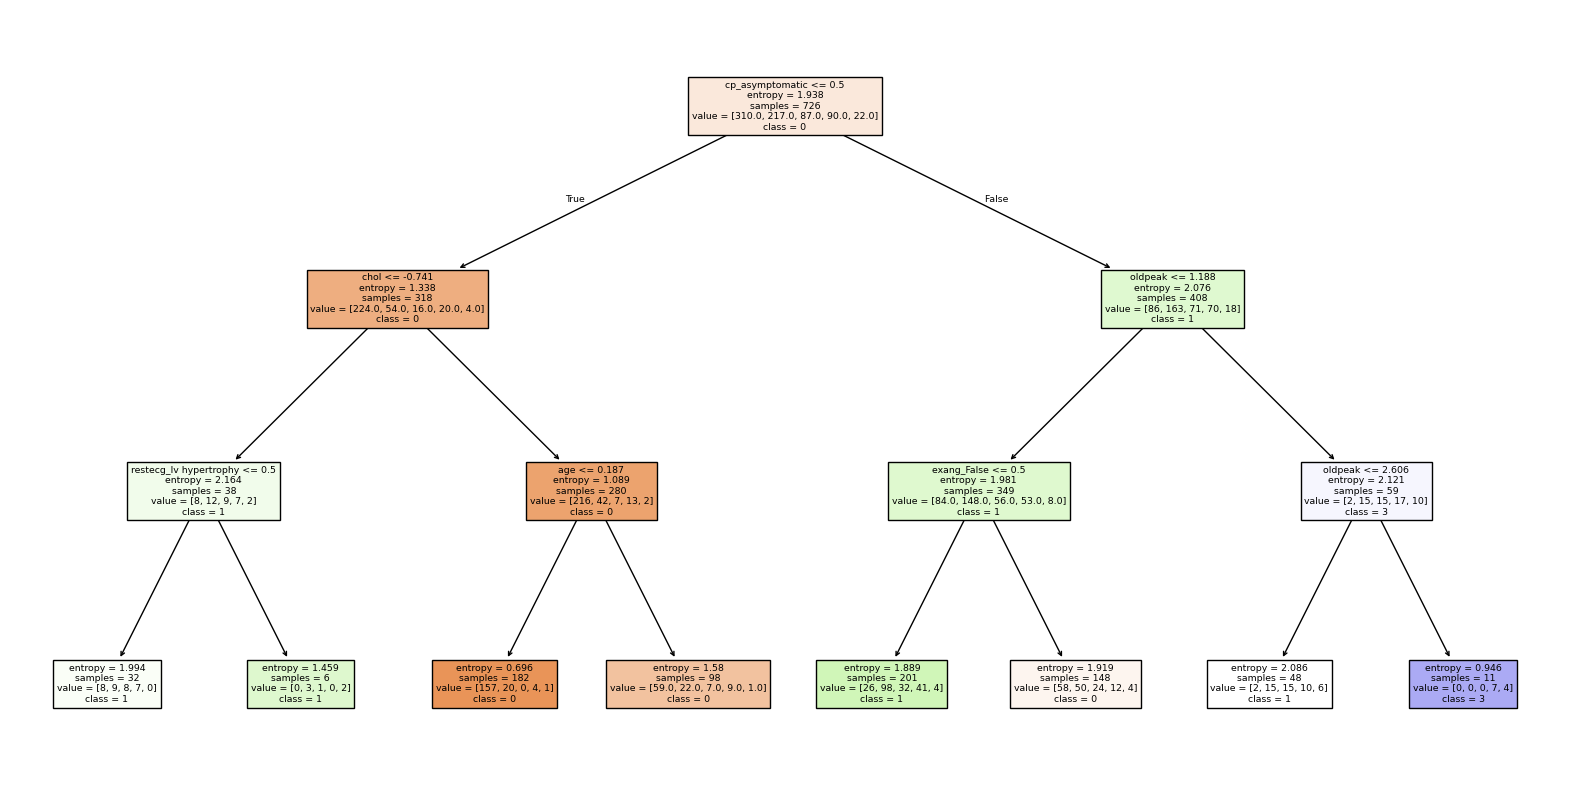

                          Importance
cp_asymptomatic             0.482692
oldpeak                     0.162538
chol                        0.137555
exang_False                 0.098914
age                         0.083671
restecg_lv hypertrophy      0.034631
sex_Female                  0.000000
exang_True                  0.000000
thal_normal                 0.000000
thal_fixed defect           0.000000
slope_upsloping             0.000000
slope_flat                  0.000000
slope_downsloping           0.000000
exang_TURE                  0.000000
exang_FALSE                 0.000000
fbs                         0.000000
sex_Male                    0.000000
restecg_st-t abnormality    0.000000
restecg_normal              0.000000
trestbps                    0.000000
cp_typical angina           0.000000
cp_non-anginal              0.000000
cp_atypical angina          0.000000
thalch                      0.000000
thal_reversable defect      0.000000


In [73]:
from sklearn.tree import plot_tree
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(best_model, feature_names=X.columns, class_names=['0', '1', '2', '3', '4'], filled=True)
plt.show()

# Analyze important features
feature_importances = pd.DataFrame(best_model.feature_importances_, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
print(feature_importances)


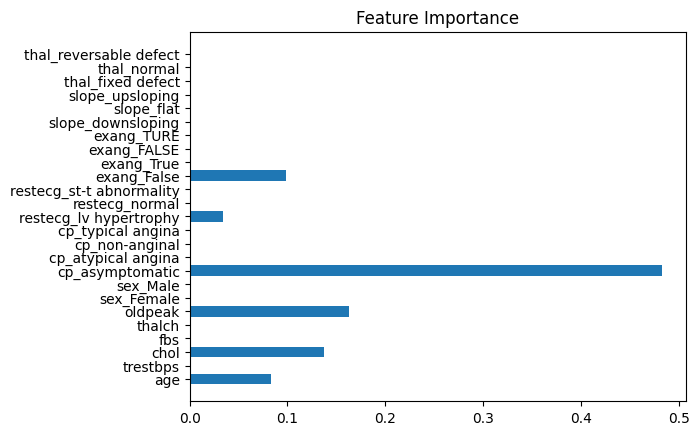

In [74]:

# Feature Importance
importances = best_model.feature_importances_
plt.barh(X.columns, importances)
plt.title("Feature Importance")
plt.show()

1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

. Max Depth (max_depth)

Effect: Limits the maximum depth of the tree. Setting this too high can cause overfitting (capturing noise in the data), while setting it too low can lead to underfitting (not capturing enough complexity).

Use: Controls the complexity of the model.

b. Minimum Samples Split (min_samples_split)

Effect: The minimum number of samples required to split an internal node. Higher values prevent the model from learning overly specific rules, reducing the risk of overfitting.

Use: Helps in controlling overfitting.

c. Minimum Samples Leaf (min_samples_leaf)

Effect: The minimum number of samples that must be present in a leaf node. Larger values can create more generalized rules, reducing overfitting.

Use: Ensures robustness in predictions.

d. Criterion (criterion)

Effect: Measures the quality of a split. Options include 'gini' for the Gini impurity and 'entropy' for the Information Gain.

Use: Determines the method to measure the homogeneity of the splits.

e. Max Features (max_features)

Effect: The number of features to consider when looking for the best split. Lower values reduce the complexity and can help in reducing overfitting, but might increase bias.

Use: Provides control over the size of the feature subset.

2. What is the difference between the Label encoding and One-hot encoding?

Label Encoding

Description: Transforms categorical values into numerical values by assigning a unique integer to each category.

Pros: Simple and efficient for algorithms that can understand ordinal relationships between categories.

Cons: Implies ordinal relationships even when none exist, which can mislead certain algorithms (e.g., linear models).

One-Hot Encoding

Description: Transforms categorical values into binary columns for each unique category, where only one column is 1 (hot) and the rest are 0 (cold).

Pros: No ordinal relationship implied, suitable for nominal categorical variables.

Cons: Can significantly increase the dimensionality of the dataset, especially with high cardinality features.